In [11]:
#!pip install mirdata==0.3.5
# !pip install seaborn
!python3 -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 6.6 MB/s eta 0:00:01
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 2.0.2 which is incompatible.
tensorflow-macos 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.
spleeter 2.3.2 requires librosa<0.9.0,>=0.8.0, but you have librosa 0.10.2.post1 which is incompatible.
spleeter 2.3.2 requires numpy<2.0.0,>=1.19.2, but you have numpy 2.0.2 which is incompatible.
numba 0.55.2 requires numpy<1.23

In [2]:
import mirdata
import numpy
from mirdata.validate import validate
import JC_utils as u

In [3]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(123)
import random

!rm -rf ~/.mirdata/gtzan_genre_index.json

orchset = mirdata.initialize('orchset')  # get the orchset dataset
orchset.download()  # download orchset
orchset.validate()  # validate orchset
track = orchset.choice_track()  # load a random track
print(track)  # see what data a track contains
orchset.track_ids()  # load all track ids

In [ ]:
data_home = '/Users/cui/Desktop/Data' # here the location you want the data to be in your Drive
dataset_name = 'gtzan_genre'
dataset_version = 'default'
dataset = mirdata.initialize(dataset_name, data_home=data_home, version=dataset_version)

# Uncomment the following line and run the download code once to download the data
#dataset.download()
#dataset.download(["index"])
# Uncomment the following line and run the validate code to check the data is correct
#dataset.validate()

# Check how many tracks and load a random track
print(len(dataset.track_ids))
dataset.choice_track().audio

INFO: Downloading ['index']. Index is being stored in /Users/cui/Library/Python/3.9/lib/python/site-packages/mirdata/datasets/indexes
INFO: [index] downloading gtzan_genre_index_1.0.json
INFO: /Users/cui/Library/Python/3.9/lib/python/site-packages/mirdata/datasets/indexes/gtzan_genre_index_1.0.json already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.


1000


(array([0.06652832, 0.09335327, 0.04510498, ..., 0.08078003, 0.06115723,
        0.04190063], dtype=float32),
 22050)

In [5]:
tracks_train, tracks_validate, tracks_test = u.split_data(dataset.load_tracks())

print("There are {} tracks in the training set".format(len(tracks_train)))
print("There are {} tracks in the validation set".format(len(tracks_validate)))
print("There are {} tracks in the test set".format(len(tracks_test)))

# Function to print random samples from a dataset split
def print_all_samples(tracks_split, split_name):
    """
    Prints all samples in the given split with relevant details.

    Parameters
    ----------
    tracks_split : list
        List of track objects in the split.
    split_name : str
        Name of the split (e.g., "training", "validation", "test").
    """
    print(f"\nAll samples from the {split_name} set:")
    for idx, track in enumerate(tracks_split, start=1):
        print(f"{idx}. Track ID: {track.track_id}, Genre: {getattr(track, 'genre', 'N/A')}, Audio Path: {track.audio_path}")

# Print random samples from each split
#print_all_samples(tracks_train, "training")
#print_all_samples(tracks_validate, "validation")
#print_all_samples(tracks_test, "test")

There are 600 tracks in the training set
There are 300 tracks in the validation set
There are 100 tracks in the test set


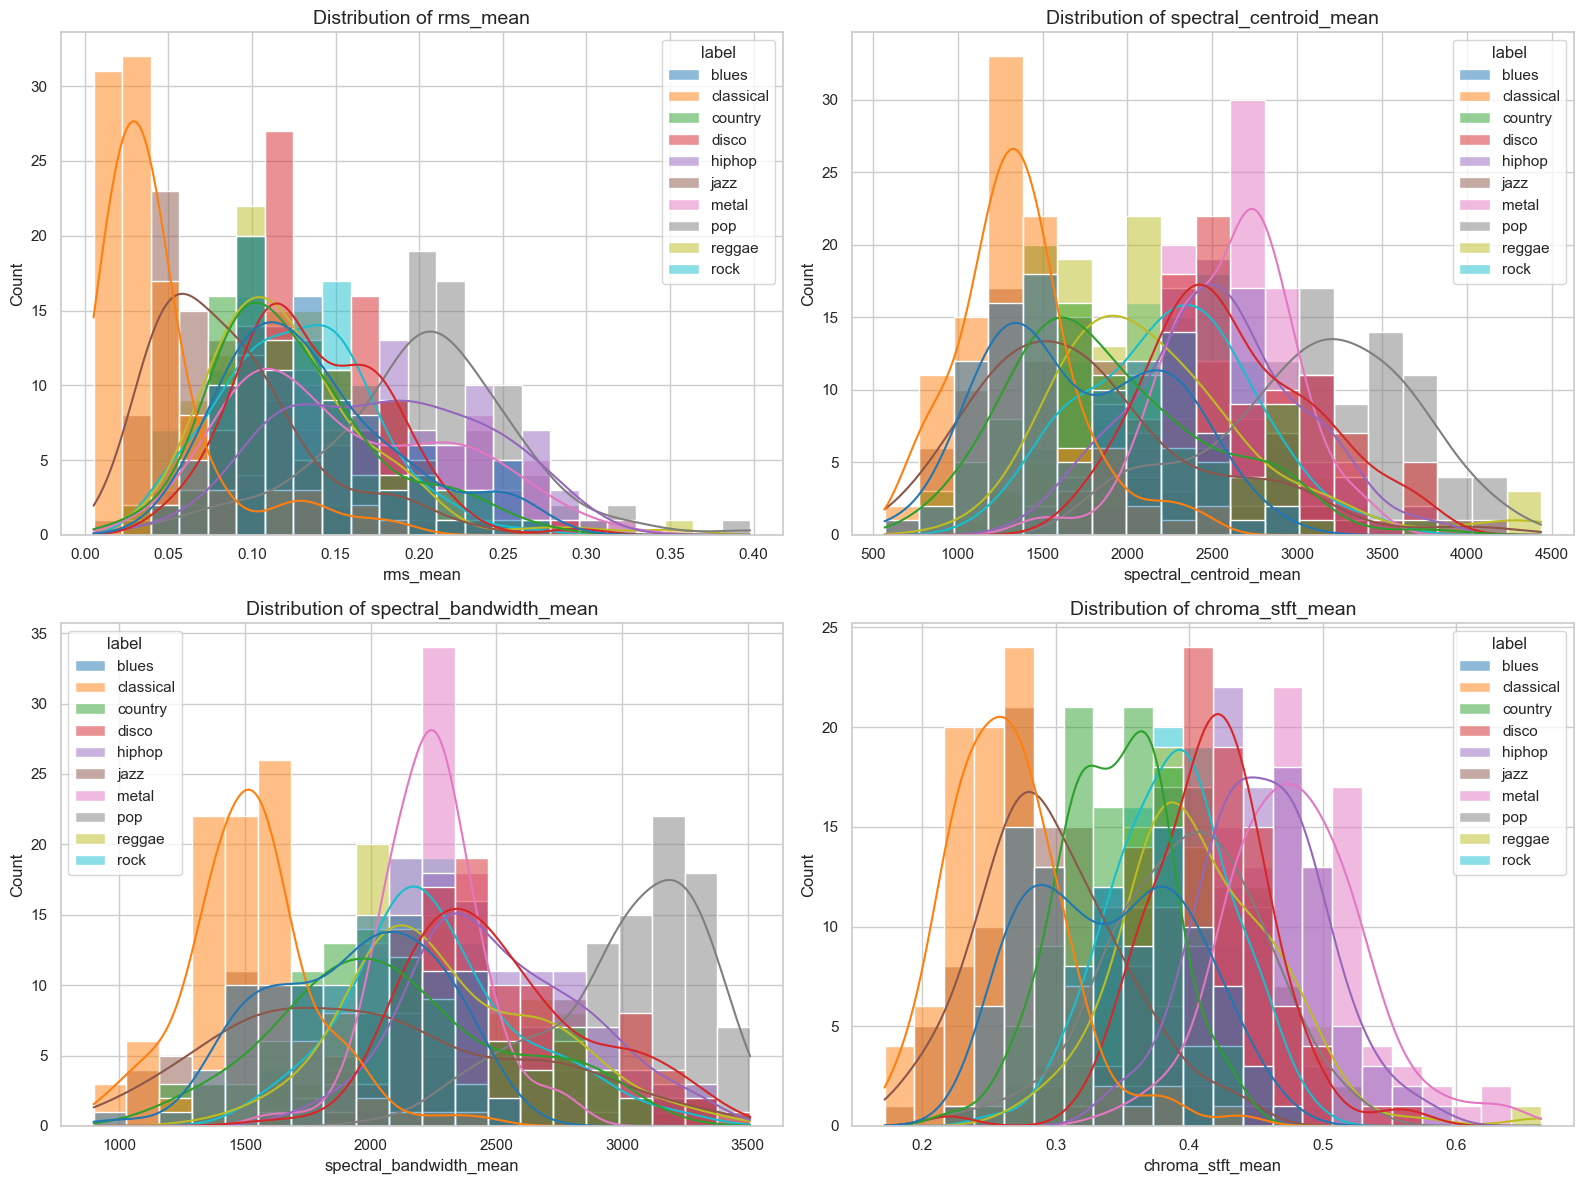

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Path to your CSV file
file_path = '/Users/cui/Desktop/Data/features_30_sec.csv'  # Adjust this to the actual file path

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Set a general style for plots
sns.set(style="whitegrid")

# Selecting a few key features to plot
key_features = ['rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean', 'chroma_stft_mean']

# Plotting feature distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for feature, ax in zip(key_features, axes.flatten()):
    sns.histplot(data=data, x=feature, hue='label', kde=True, ax=ax, palette='tab10')
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# Plotting correlation heatmap
# plt.figure(figsize=(12, 10))
# corr_matrix = data[key_features].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap of Key Features", fontsize=16)
# plt.show()

# Boxplot for a key feature grouped by genre
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=data, x='label', y='rms_mean', palette='tab10')
# plt.title("Boxplot of RMS Mean by Genre", fontsize=16)
# plt.xlabel("Genre", fontsize=12)
# plt.ylabel("RMS Mean", fontsize=12)
# plt.xticks(rotation=45)
# plt.show()

In [16]:
# run this to obtain features and labels for each data split
# this can take some time.
X_raw_train, Y_train = u.get_features_and_labels(tracks_train)
X_raw_validate, Y_validate = u.get_features_and_labels(tracks_validate)
X_raw_test, Y_test = u.get_features_and_labels(tracks_test)

# save features so you don't have to run this again
np.save('X_raw_train.npy', X_raw_train)
np.save('X_raw_validate.npy', X_raw_validate)
np.save('X_raw_test.npy', X_raw_test)

np.save('Y_train.npy', Y_train)
np.save('Y_validate.npy', Y_validate)
np.save('Y_test.npy', Y_test)

AttributeError: 'Track' object has no attribute 'instrument_id'